<h1><center>Лабораторная работа 2. Решение нелинейных уравнений</center></h1>

# Задание I

Разработать алгоритмы численного решения системы линейных уравнений
(метод Гаусса, метод Гаусса-Жордана, метод Якоби, метод Гаусса-Зейделя).
Представить их реализацию в выбранном языке высшего уровня, оформляя каждый
метод численного решения в виде функций. Проилюстрировать работу функций на
примере решения системы линейных уравнений (выбрать согласно варианту задания).
Найти оценку абсолютной и относительной погрешности решения, принимая
абсолютную погрешность свободных членов исходной системы $e=10^{-3}$. Оценить сходимость полученного численного решения.

### Инициализируем уравнение(вариант 10)

![Initialization System](https://i.imgur.com/YrI1BBp.png)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
a=np.array([[2.958,0.147,0.354,0.238],
            [0.127,2.395,0.256,0.273],
            [0.403,0.184,3.815,0.416],
            [0.259,0.361,0.281,3.736]])
b=np.array([0.651,0.898,0.595,0.389])


# Метод Гаусса

In [43]:
import numpy as np

x=np.zeros(len(b),float)
def Gauss(a,b):
    
    n=len(b)
    for k in range(n):
        submax=-999999
        for i in range(k, n):
            if (a[i][k]>submax):
                submax=a[i][k]
                posmax=i
        a[k],a[posmax]=a[posmax],a[k]
        b[k],b[posmax]=b[posmax],b[k]
        for i in range(k+1,n):
            factor=a[i][k]/a[k][k]
            for j in range(k,n):
                a[i][j]-=factor*a[k][j]
            b[i]-=factor*b[k]
    x[n-1]=b[n-1]/a[n-1][n-1]
    for k in range(n-2,-1,-1):
        sum_ax=0
        for j in range(k+1,n):
            sum_ax+=a[k][j]*x[j]
        x[k]=(b[k]-sum_ax)/a[k][k]
    return x
       
    
        



In [44]:
Gauss(a,b)

array([0.18519046, 0.34731112, 0.11429252, 0.04912745])

# Метод Жордана-Гаусса

In [45]:
import numpy as np

x=np.zeros(len(b),float)
def GaussJordan(a,b):
    n=len(b)
    for i in range(n):
        if (a[i][i]==0):
            k=i
            while (a[k][i]==0):
                k+=1
            a[i],a[k]=a[k],a[i]
            b[i],b[k]=b[k],b[i]
        pivot=a[i][i]
        a[i]/=a[i][i]
        b[i]/=pivot
       
        for j in range(i+1,n):
            factor=a[j][i]
            a[j]=a[j]-factor*a[i]
            b[j]=b[j]-factor*b[i]
    for i in range(n-1, -1, -1):
        for j in range(i-1,-1,-1):
            print(a,factor,j,i)
            factor=a[j][i]
            a[j]-=factor*a[i]
            b[j]-=factor*b[i]
    
        
    return b
       
            
            
    

In [46]:
GaussJordan(a,b)

[[1.         0.04969574 0.11967546 0.08045977]
 [0.         1.         0.10080896 0.11001083]
 [0.         0.         1.         0.09746999]
 [0.         0.         0.         1.        ]] 0.0 2 3
[[1.         0.04969574 0.11967546 0.08045977]
 [0.         1.         0.10080896 0.11001083]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         1.        ]] 0.09746999225326884 1 3
[[1.         0.04969574 0.11967546 0.08045977]
 [0.         1.         0.10080896 0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         1.        ]] 0.11001082547463883 0 3
[[1.         0.04969574 0.11967546 0.        ]
 [0.         1.         0.10080896 0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         1.        ]] 0.08045977011494251 1 2
[[1.         0.04969574 0.11967546 0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.        

array([0.18519046, 0.34731112, 0.11429252, 0.04912745])

# Метод Якоби

In [59]:
def Jacobi(a,b,err_max=10**-3):
    err=9999
    x=np.zeros(len(b))
    err_max=10**-3
    iteration=0
    D=np.diag(np.diag(a))
    
    D_REVERSE=D
    L_U=(a-np.diagflat(np.diag(a)))*(-1)
    error=[0]
    iteration=0
    while err>err_max:
        iteration+=1
        ram_x = x
        x= np.dot(np.dot(D_REVERSE,L_U),x)+np.dot(D_REVERSE,b)
        err=abs(np.linalg.norm(x)-np.linalg.norm(ram_x))
        error.append(err)
    plt.plot(range(0,len(error)),error)
    plt.show()
    return x


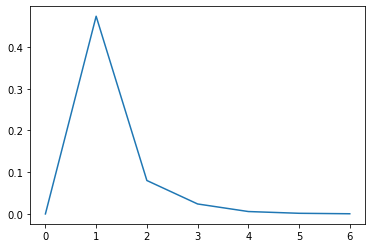

array([0.18514637, 0.34726353, 0.11424666, 0.04908437])

In [60]:
Jacobi(a,b)

# Метод Гаусса-Зейделя

In [51]:
import numpy as np
a=np.array([[2.958,0.147,0.354,0.238],
            [0.127,2.395,0.256,0.273],
            [0.403,0.184,3.815,0.416],
            [0.259,0.361,0.281,3.736]])
b=np.array([0.651,0.898,0.595,0.389])


def Gauss_Seidel(a,b,err_max=10**-3):
    err=999
    error=[0]
    x=np.zeros(len(b),float)
    D=np.diag(np.diag(a))
    L=np.tril(a,-1)*(-1)
    print(L)
    U=np.triu(a,1)*(-1)
    print(U)
    T=np.dot(np.linalg.inv(D-L),U)
    C=np.dot(np.linalg.inv(D-L),b)
    while err>err_max:
        ram_x=x
        x=np.dot(T,x)+C
        err=abs(np.linalg.norm(x)-np.linalg.norm(ram_x))
        error.append(err)
    plt.plot(range(0,len(error)),error)
    plt.show()
    return x
    

[[-0.    -0.    -0.    -0.   ]
 [-0.127 -0.    -0.    -0.   ]
 [-0.403 -0.184 -0.    -0.   ]
 [-0.259 -0.361 -0.281 -0.   ]]
[[-0.    -0.147 -0.354 -0.238]
 [-0.    -0.    -0.256 -0.273]
 [-0.    -0.    -0.    -0.416]
 [-0.    -0.    -0.    -0.   ]]


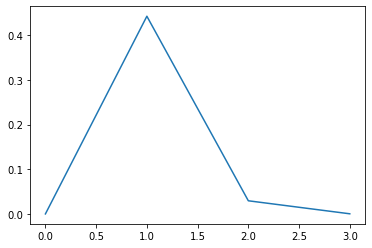

array([0.18511605, 0.34726751, 0.11430622, 0.04913579])

In [52]:
Gauss_Seidel(a,b)

# Задание II

Сформулируйте задачу, математическую модель которой можно представить в виде системы линейных уравнений. Задайте численные значения параметров системы. Сравнить на примере полученной системы сходимость метода сопряженных градиентов и  переобусловленого метода сопряженных градиентов.

Ударимся немного в скандинавскую мифологию и придумаем условие для задачи.

Шёл 2015 год. Команда из выдуманной мультивселенной Marvel «Мстители» после успешной атаки на последнюю базу «Гидры» в Заковии, решила это отметить. Была организована вечеринка…

Участники решили, что смогут поднять молот одного из участника этой команды. Однако у них ничего не получалось. Оказалось, что они «недостойны». 

Всё потому, что этот легендарный молот имеет встроенный механизм, который считывает 20 характеристик персонажа и составляет из них систему уравнений. Составив уравнение, молот подбирает к ней решение и если не один из корней системы не больше 1, то молот решает, что персонаж достоин.

Помогите определить по заданным характеристикам достоин ли персонаж.




Пусть характеристики персонажа будут такими же, как в варианте 10.

# Метод сопряженного градиента

In [294]:

def conjugate_gradient(a,b,err_max=10**-3):
    err=999
    error=[0]
    x=np.zeros(len(b))
    x=x.reshape(-1,1)
    b=b.reshape(-1,1)
    r=b-np.dot(a,x)
    p=r
    
    rt=r.reshape(1,-1)
    pt=r.reshape(1,-1)
    alpha_numerator=np.dot(rt,r)
    alpha_determinator=np.dot(np.dot(pt,a),p)
    alpha=alpha_numerator[0][0]/alpha_determinator[0][0]
    
    while(err>err_max):
        ram_x=x
        x=x+np.dot(alpha,p)
        err=abs(np.linalg.norm(x)-np.linalg.norm(ram_x))
        error.append(err)
        new_r=r-np.dot(np.dot(alpha,a),p)
        new_rt=new_r.reshape(1,-1)
        beta_numerator=np.dot(new_rt,new_r)
        beta_determinator=np.dot(rt,r)
        beta=beta_numerator[0][0]/beta_determinator[0][0]
        
        r=new_r
        rt=new_rt
        p=r+np.dot(beta,p)
        
        pt=p.reshape(1,-1)
        alpha_numerator=np.dot(rt,r)
        alpha_determinator=np.dot(np.dot(pt,a),p)
        alpha=alpha_numerator[0][0]/alpha_determinator[0][0]
        
    plt.plot(range(0,len(error)),error)
    plt.show()
        
    return x
        
    
    
    

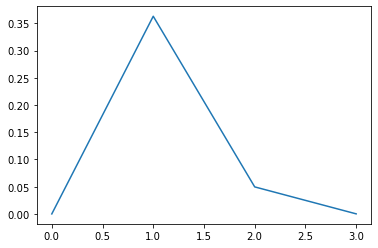

array([[0.18517529],
       [0.3474509 ],
       [0.11406049],
       [0.04867943]])

In [295]:
conjugate_gradient(a,b)

In [298]:
def preconditioned_conjugate(a,b,err_max=10**-3):
    err=999
    error=[0]
    b=b.reshape(-1,1)
    x=np.zeros(len(b))
    x=x.reshape(-1,1)
    
    r=b-np.dot(a,x)
    M=np.linalg.inv(a)
    z=np.dot(M,r)
    p=z
    while(err>err_max):
        ram_x=x
        rt=r.reshape(1,-1)
        pt=p.reshape(1,-1)
        alpha=np.dot(rt,z)/np.dot(np.dot(pt,a),p)
        x=x+np.dot(alpha[0][0],p)
        err=abs(np.linalg.norm(x)-np.linalg.norm(ram_x))
        error.append(err)
        new_r=r-np.dot(np.dot(alpha[0][0],a),p)
        new_z=np.dot(M,r)
        new_rt=new_r.reshape(1,-1)
        new_zt=new_z.reshape(1,-1)
        beta=np.dot(new_rt,new_z)/np.dot(rt,z)
        z=new_z
        p=z+np.dot(beta[0][0],p)
        r=new_r
    plt.plot(range(0,len(error)),error)
    plt.show()
    print(x)
        
        
        

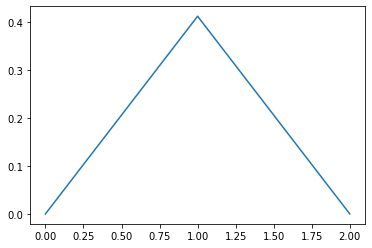

[[0.18519046]
 [0.34731112]
 [0.11429252]
 [0.04912745]]


In [299]:
preconditioned_conjugate(a,b)

# Задание III

In [34]:
def init_matrix(n):
    A=np.array([[.0 for j in range(n)] for i in range(n)])
    for i in range(n):
        for j in range(n):
            A[i][j]=1/(i+1+j+1-1)
    return A

In [35]:
def round(a,n):
    for i in range(n):
        for j in range(n):
            ram=float('{:.4f}'.format(a[i][j]))
            a[i][j]=ram
    return a

In [39]:
n=3
a=init_matrix(n)
a=round(a,3)
print(a)
a_inv=np.linalg.inv(a)
a_inv=round(a_inv,3)
print(a_inv)
a_inv_inv=np.linalg.inv(a_inv)
a_inv_inv=round(a_inv_inv,3)
print(a_inv_inv)
print(np.linalg.norm(a-a_inv_inv,ord=np.inf))
print(np.linalg.norm(np.linalg.inv(a))*np.linalg.norm(a))

[[1.     0.5    0.3333]
 [0.5    0.3333 0.25  ]
 [0.3333 0.25   0.2   ]]
[[   9.0617  -36.3232   30.3026]
 [ -36.3232  193.6753 -181.5616]
 [  30.3026 -181.5616  181.4526]]
[[1.0001 0.5    0.3333]
 [0.5    0.3333 0.25  ]
 [0.3333 0.25   0.2   ]]
9.999999999998899e-05
530.6592501680501


Как видим с учётом округледия до четвертого разряда, матрица приобретает дополнительную погрешность